# FOOD DESERTS

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64

In [3]:
# opening food desert 
with open('data/Cleaned Food Desert Data.csv') as f:
    df = pd.read_csv(f)
# opening health outcomes
with open('data/Cleaned Health Outcomes Data 2.csv') as g:
    df2 = pd.read_csv(g)
# changing the health outcomes census tract column name to match
df2 = df2.rename(columns={"tract_fips": "census_tract"})
# merging both using census tract as key | total: 35253 rows × 146 columns
result = pd.merge(df, df2, on="census_tract") # total: 35253 rows × 146 columns

In [19]:
# filter by desired columns | total: 35253 rows × 8 columns
filtered_data = result.filter(['census_tract', 'state_abbr', 'county', 'total_population', 'urban', 'diabetes_crude_prev', 'la_population_1/2', 'la_population_1'])

In [21]:
# determine unique values for urban | 1 = true
urban_def = df['urban'].unique()
urban_def

array([1, 0])

In [22]:
# filter out non-urban areas
urban_data = filtered_data[filtered_data.urban != 0]
urban_data['urban'].unique() # confirms only urban = 1 is in dataset  
urban_data

,census_tract,state_abbr,county,total_population,urban,diabetes_crude_prev,la_population_1/2,la_population_1
0,1001020100,AL,Autauga,1912,1,11.3,1732.225468,1357.480940
1,1001020200,AL,Autauga,2170,1,14.2,1410.374828,483.429683
2,1001020300,AL,Autauga,3373,1,11.8,2764.604126,1417.874893
3,1001020400,AL,Autauga,4386,1,10.8,3651.061015,1363.466885
4,1001020500,AL,Autauga,10766,1,9.2,7778.396188,2643.095161
...,...,...,...,...,...,...,...,...
35248,27013171600,MN,Blue Earth,5023,1,4.5,5023.000022,5023.000022
35249,27015960101,MN,Brown,2000,1,8.9,2000.000007,1409.638154
35250,27015960102,MN,Brown,1270,1,9.0,856.925676,78.676375
35251,27015960200,MN,Brown,4482,1,7.6,3984.920064,2544.475905


## ONE DIMENSIONAL DISTRIBUTIONS

array([[<AxesSubplot:title={'center':'total_population'}>]], dtype=object)

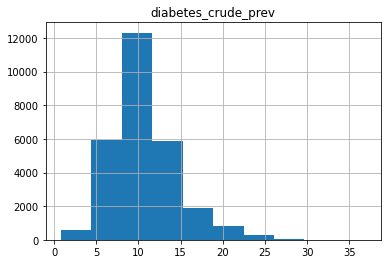

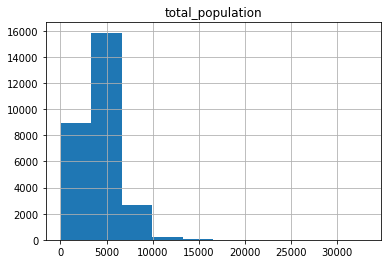

In [7]:
urban_data.hist(column='diabetes_crude_prev')
urban_data.hist(column='total_population')

## TWO DIMENSIONAL DISTRIBUTIONS

In [17]:
# correlation between diabetes and urban food deserts 
# grouping prevelance of diabetes in urban areas by state (INCL state pop)
fd = urban_data[['state_abbr', 'diabetes_crude_prev', 'total_population']]
fd_totals = fd.groupby('state_abbr').agg(diabetes_prev_total=('diabetes_crude_prev', 'mean'))
fd_total_pop = fd.groupby('state_abbr').agg(total_urban_pop=('total_population', 'sum'))

<AxesSubplot:xlabel='state_abbr'>

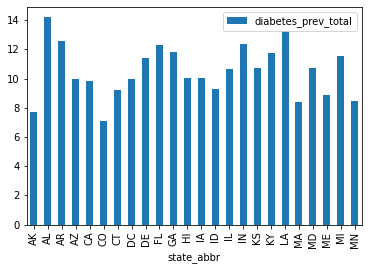

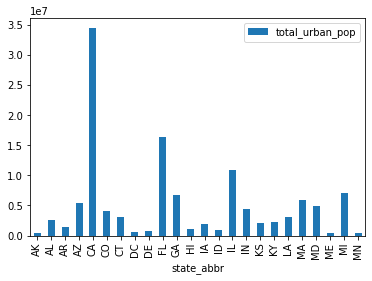

In [18]:
fd_totals.plot.bar()
fd_total_pop.plot.bar()

In [28]:
# correlation between distance from grocery store
# grouping number of counties x amount of distance from a grocery store
fd = urban_data[['state_abbr', 'la_population_1/2', 'la_population_1', 'total_population']]
# fd = fd[fd.li_la_tracts_1_and_10_mile != 0]
fd_totals = fd.groupby(['state_abbr']).agg(pop_cnt_1=('la_population_1', 'sum'), pop_cnt_1_2=('la_population_1/2', 'sum'))
fd_totals

,pop_cnt_1,pop_cnt_1_2
state_abbr,,
AK,1.642450e+05,3.173623e+05
AL,1.042435e+06,1.991380e+06
AR,5.335168e+05,1.130721e+06
AZ,1.435067e+06,3.623494e+06
CA,4.821254e+06,1.673535e+07
CO,1.023537e+06,2.762702e+06
CT,1.065111e+06,2.124171e+06
DC,1.274941e+04,1.618841e+05
DE,2.283973e+05,5.010732e+05


<AxesSubplot:xlabel='state_abbr'>

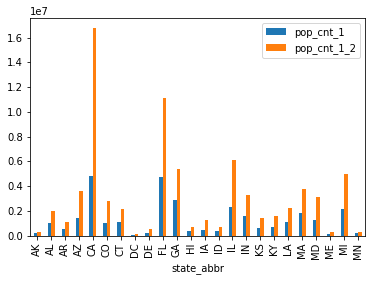

In [29]:
fd_totals.plot.bar()